## Description 

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.<br>

We have a new dataset describing the Breast cancer (Source Kaggle). Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The 3-dimensional space is that described in: ”K. P. Bennett and O. L. Mangasarian: ”Robust Linear Programming Discrimination of Two Linearly Inseparable Sets”, Optimization Methods and Software 1, 1992, 23-34”. <br>

This database is also available through the UW CS ftp server: ¿ ftp ftp.cs.wisc.edu ¿ cd math-prog/cpo- dataset/machine-learn/WDBC/ <br>

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29.<br>

The Attribute Information are: 
1. ID number 
2. Diagnosis (M = malignant, B = benign) <br>

Ten real-valued features are computed for each cell nucleus: 
1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter2 area−1.0 ) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour) 
9. symmetry 
10. fractal dimension (”coastline approximation” - 1) <br>

The mean, standard error and ”worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. All feature values are recorded with four significant digits. <br>

<b>To do: Make a comparative study between Logistic regression and Naive Bayes.<b>

## Load Libraries

In [163]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

## Load the data

In [164]:
df_breast_cancer = pd.read_csv("C:\\Users\\Sascha\\OneDrive\\Documents\\ESILV\\2023_2024\\Obsidian\\ESILV_23_24\\Machine Learning\\PW\\PW3\\breast-cancer.csv")

In [165]:
df_breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Explore the data

In [166]:
print("The dataframe has {} rows".format(df_breast_cancer.shape[0]))
print("The dataframe has {} columns".format(df_breast_cancer.shape[1]))

The dataframe has 569 rows
The dataframe has 32 columns


In [167]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [168]:
df_breast_cancer.columns    

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [169]:
df_breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [170]:
# Any missing values?
df_breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [171]:
df_breast_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='Count'>

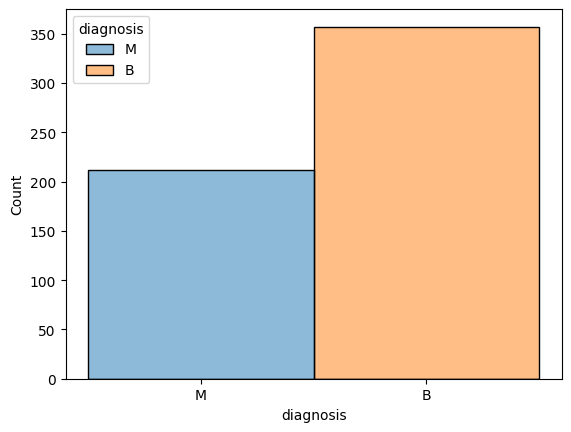

In [172]:
sns.histplot(data=df_breast_cancer, x="diagnosis", hue="diagnosis")

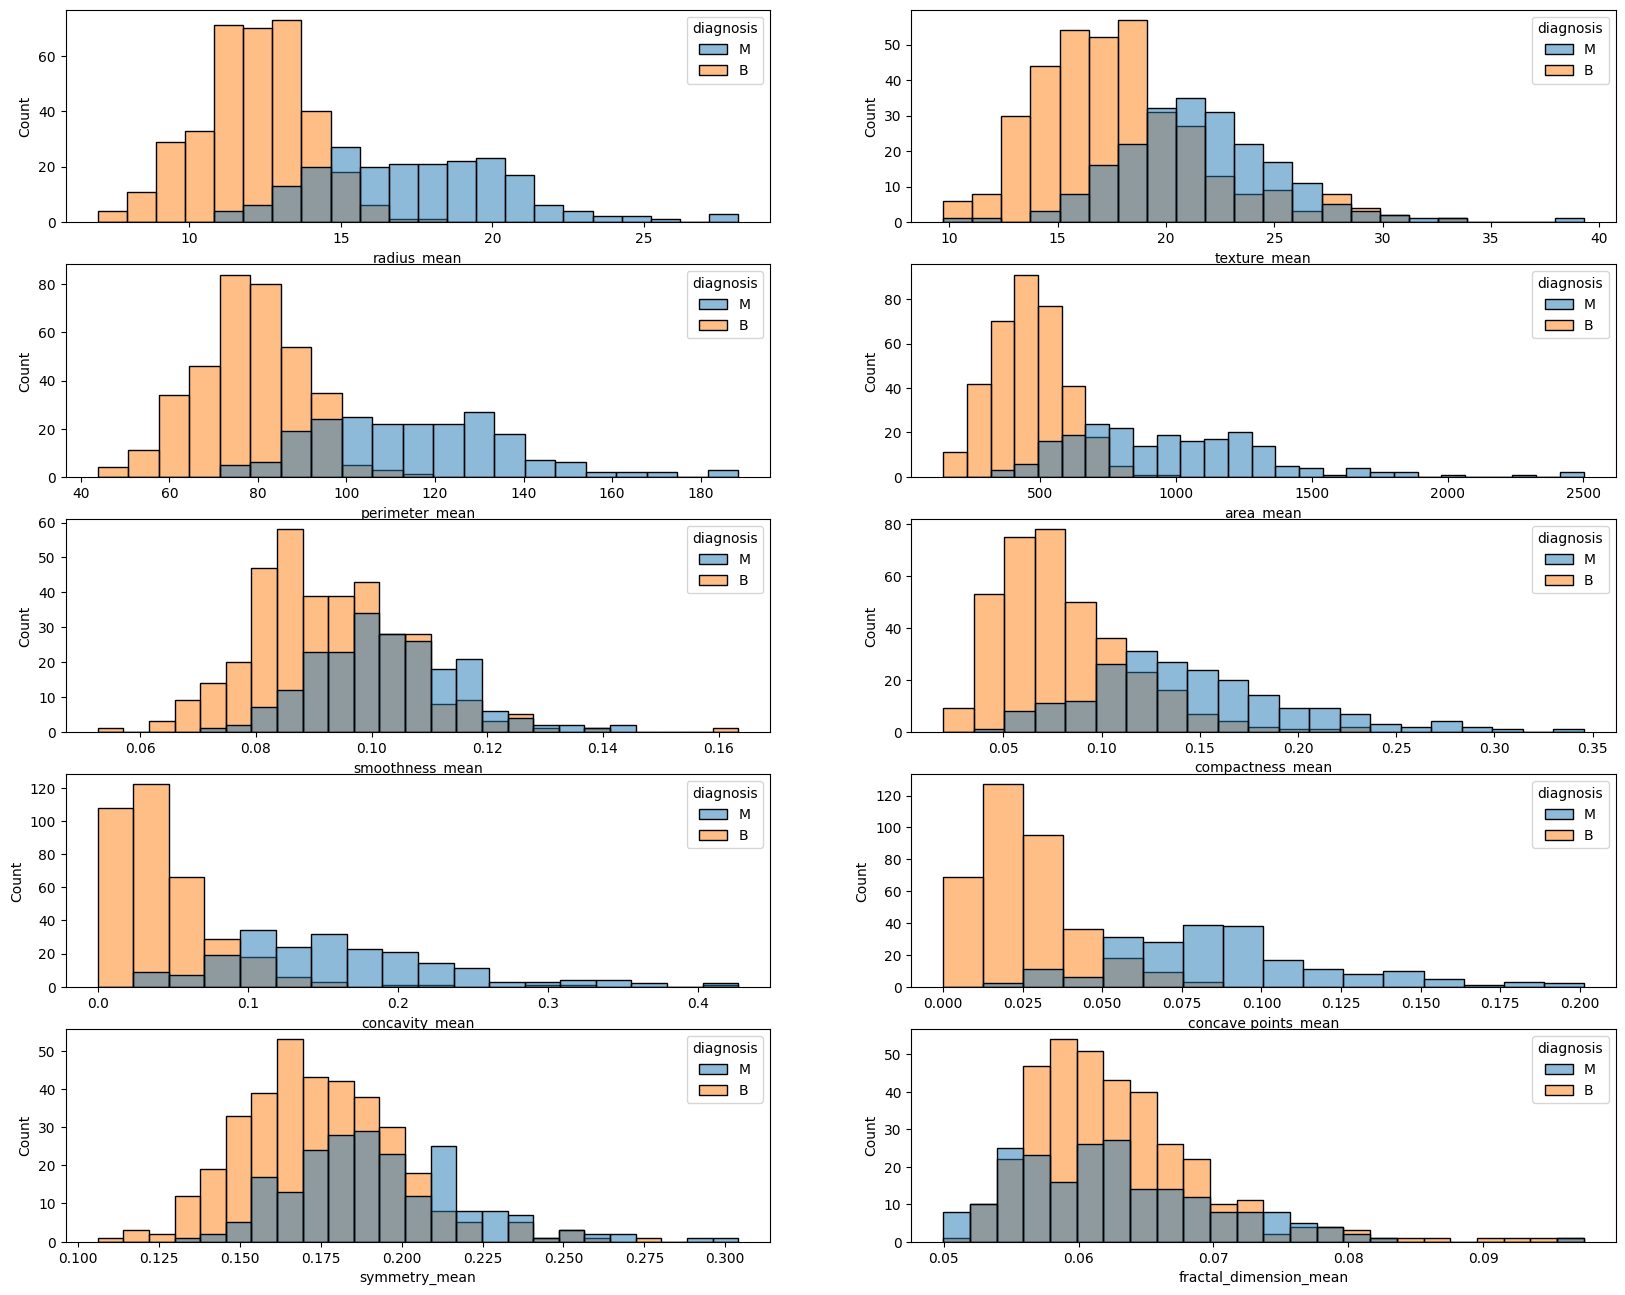

In [173]:
# Let us look at the ten mean features that are computed for each cell nucleus and compare them to the diagnosis:
figure, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(20,16))
ax = ax.flatten()
for i in range(10):
    sns.histplot(data=df_breast_cancer, x=df_breast_cancer.columns[i+2], hue="diagnosis", ax=ax[i])

From the above we notice that some features could be interesting for our models. We will use the following features for the classification: radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, and concave points_mean. The mean values of the other features does not show a particular preference of one diagnosis over the other. <br>

We will confirm our choice by looking at the correlation between the features and the diagnosis.

## Data processing

In [174]:
# We do not need the id column, so we can either drop it or set it as the index of the dataframe:
# In this case we can set it as the index:
df_breast_cancer.set_index('id', inplace=True)

In [175]:
# The label of this dataset is the diagnosis column, we will encode it as 0 for benign and 1 for malignant:
df_breast_cancer['diagnosis'] = df_breast_cancer['diagnosis'].map({'B':0, 'M':1})
df_breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

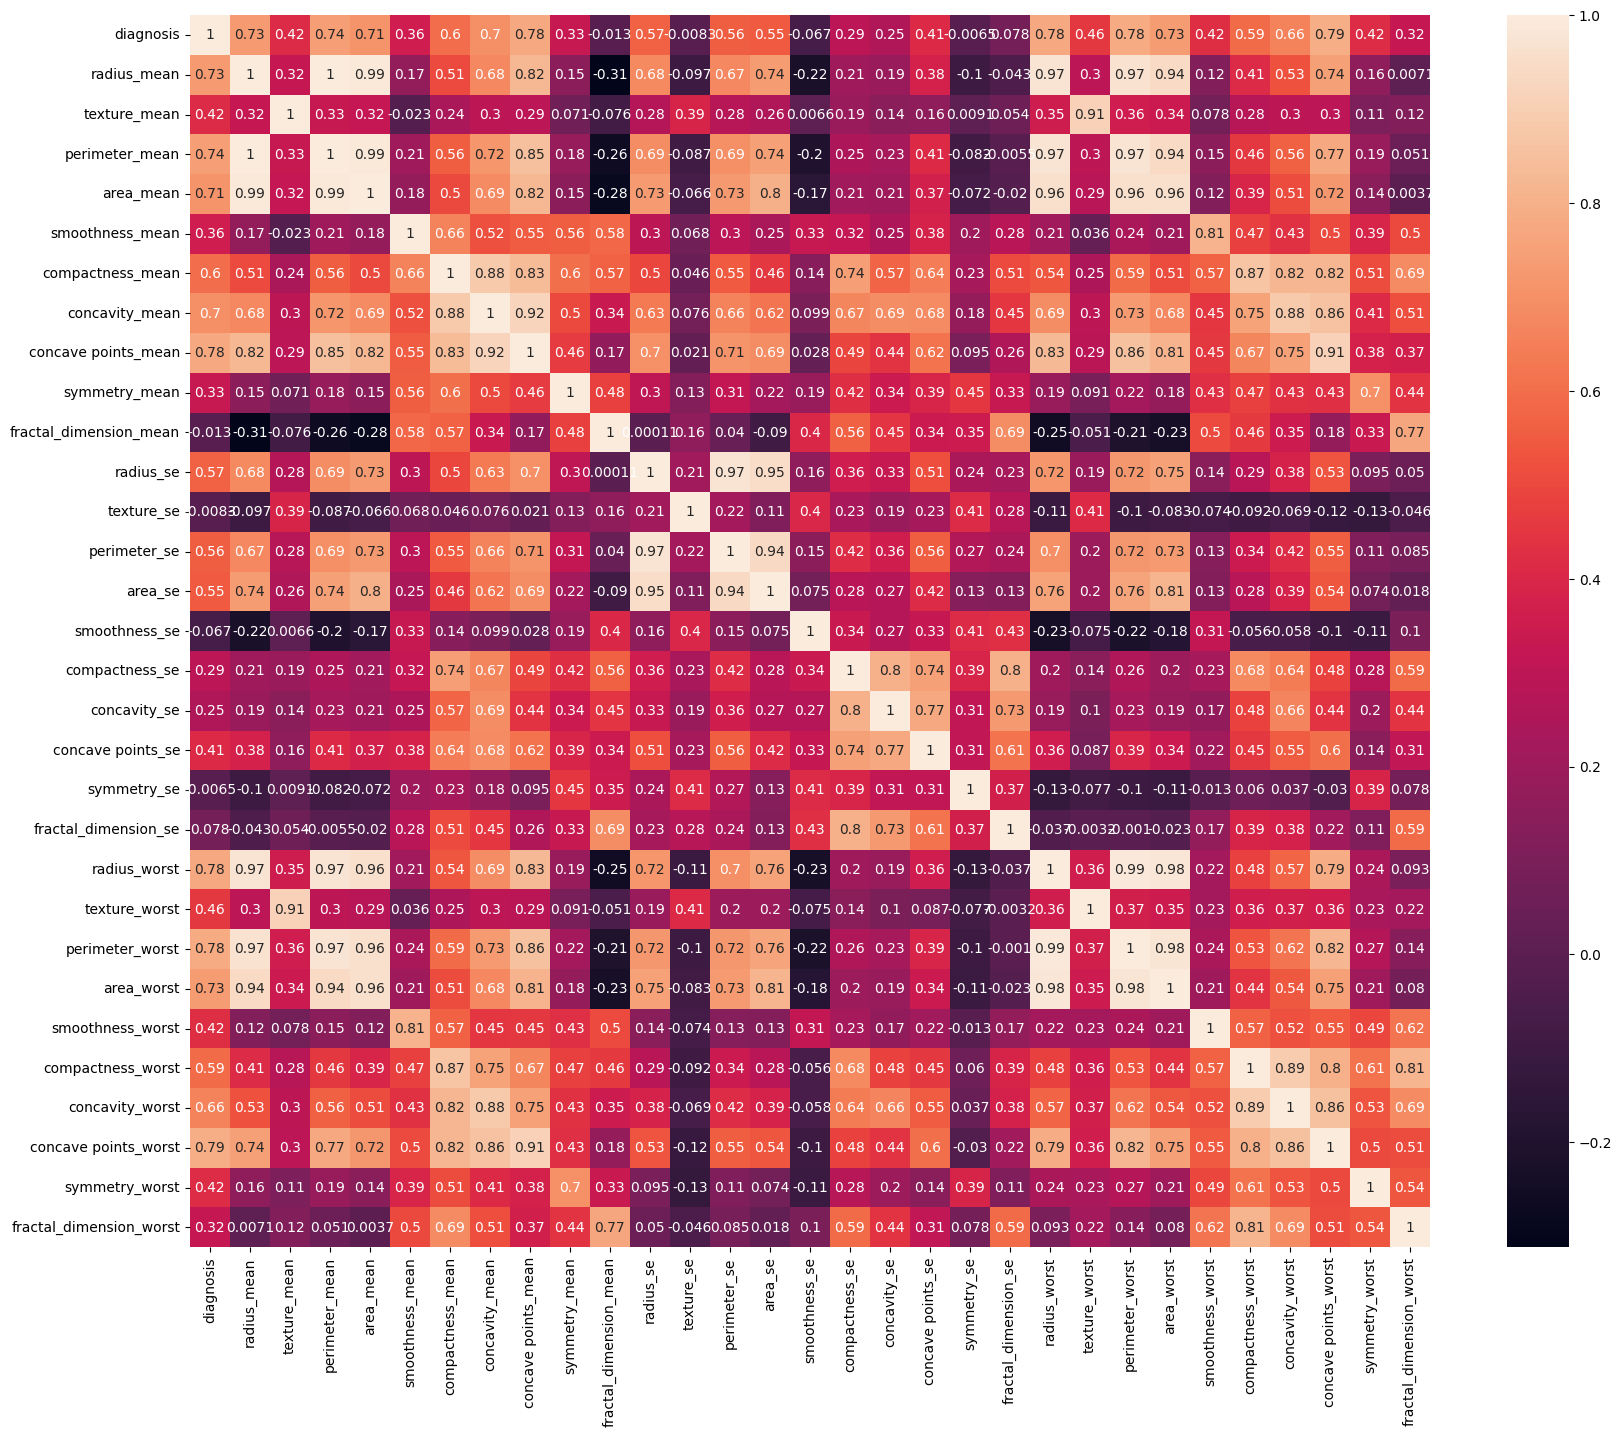

In [176]:
# To confirm our selection of features that will be used to train our model, we can plot the correlation matrix:
plt.figure(figsize=(20,16))
sns.heatmap(df_breast_cancer.corr(), annot=True)

In [177]:
corr = df_breast_cancer.corr()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.5), If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
relevant_features = cor_target[cor_target>0.5]

# Collect the names of the features
names = [index for index,values in relevant_features.items()]

# Remove the target variable
names.remove('diagnosis')

In [178]:
# Now that we have the features that we will use to train our model, we can define our data and target variables:

x = df_breast_cancer[names]
y = df_breast_cancer['diagnosis']

In [179]:
# For splitting the data we can do a 80/20 split as we have higher accuracy in the model development:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Use StandardScaler to bring all features to a common scale:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # fit it to the training data
x_test = scaler.transform(x_test) #transform validation data

## Model building and evaluation

In [180]:
def train_evaluate_model(model, x_train, x_test, y_train, y_test):
    #fit the model to the training data
    model.fit(x_train, y_train)

    #make predictions on the test data
    y_pred = model.predict(x_test)

    #compute metrics for evaluation (accuracy, precision, f1_score, recall)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    #return a dataframe containing the metrics 
    return pd.DataFrame([[accuracy, f1, recall, precision]],
                        columns=['accuracy', 'f1_score', 'precision', 'recall'])

### Model building and evaluation with Logistic Regression on the selected features

In [181]:
# Logistic Regression
lg = LogisticRegression()

lg_results = train_evaluate_model(lg, x_train, x_test, y_train, y_test)
lg_results.index = ["Logistic Regression"]

In [182]:
lg_results

,accuracy,f1_score,precision,recall
Logistic Regression,0.964912,0.953488,0.953488,0.953488


### Model building and evaluation with Naive Bayes on the selected features

In [183]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes_result = train_evaluate_model(naive_bayes, x_train, x_test, y_train, y_test)
naive_bayes_result.index = ["Naive Bayes"]
naive_bayes_result

,accuracy,f1_score,precision,recall
Naive Bayes,0.964912,0.952381,0.930233,0.97561
